In [250]:
import Pkg; Pkg.activate("C:/Users/s151781/AppData/Local/Julia-1.3.1/GN/Project.toml")
using LinearAlgebra
using PyPlot
using Compat
using WAV
using Base64
using DSP
using FFTW
using Distributions
using GaussianMixtures
using ProgressMeter

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/preprocessing.jl")
;

Activating environment at `C:\Users\s151781\AppData\Local\Julia-1.3.1\GN\Project.toml`


In [251]:
# signal preprocessing
sound_file1 = "../data/woman.wav"     # specify sound location
sound_file2 = "../data/airco.wav"     # specify sound location
fs_desired = 8000                     # specify desired sampling frequency
normalization_method = "max"          # specify normalization method
μ = 255                               # specify parameter for μ-law companding and expansion
nr_freqs = 32                         # specify number of Fourier coefficients
pole_location = 0.4092                # specify pole location of warped filter bank (fs=8000: ~4092, fs=16000: ~0.5756)
step_size = 4                         # specify desired stepsize (currently trade-off between step size and distortion) TODO: ask Tanya, Bert or Joris
;

In [252]:
# load signals
x1, fs1 = wavread(sound_file1, format="native")
fs1 = Int(fs1)
x1 = convert(Array{Float64,1}, squeeze(x1[:,1]))[1*fs1:4*fs1]
x2, fs2 = wavread(sound_file2, format="native")
fs2 = Int(fs2)
x2 = convert(Array{Float64,1}, squeeze(x2[:,1]))[1*fs2:4*fs2]

# preprocess signals
y1i = resample(x1, fs_desired/fs1)
y1i = normalize(y1i, normalization_method)
#y1 = μ_law_companding(y1i, μ)
y1 = warp_fft(y1i, pole_location, nr_freqs, step_size=step_size)
y1a = log.(abs.(y1))
#y1 = fftcoefs2realimag(y1)

y2i = resample(x2, fs_desired/fs2)
y2i = 0.1*normalize(y2i, normalization_method)
#y = μ_law_companding(y, μ)
y2 = warp_fft(y2i, pole_location, nr_freqs, step_size=step_size)
y2a = log.(abs.(y2))
#y2 = fftcoefs2realimag(y2)

xtot = y1i + y2i
ytot = warp_fft(xtot, pole_location, nr_freqs, step_size=step_size)
ytota = log.(abs.(ytot))
#ytot = fftcoefs2realimag(ytot)

### perform processing here ###
#y = realimag2fftcoefs(y)
#y = warp_ifft(y, pole_location, step_size)
#y = μ_law_expansion(normalize(y, "max"), μ)



# show segments of data
audioplayers(normalize(x1, "max"), normalize(x2, "max"), normalize(xtot, "max"), fs=fs1)

<source src="data:audio/wav;base64,UklGRkDuAgBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQTuAgC7wzW+hPtRvnu0Xr5+VFG+tRw1vvaSJ74mZBG+FyL0vYog5b1T2sO93dBpvaZ7/Lux6z4937G/Pej4Bz6AXzo+yppdPk6Yhz6taJ8+OcKxPrnNwj73o8I+oDHAPjEjuz6VM7g+LXSwPjC8nz5aPF8+Ke3iPZ6PIT01/gW97fc0vfneGr2qyi293Q2cvcsBI740w4K+/vKUvjYilL4ndYG+qh4tvoLZ8b1jAY+9V7ONvUzMp73ENGe9qWMSva0txrkqKhU9FMOOPQzjtj3RlYc9BqcsPYszBD2OkS07UJLSvKBKY73IeKe9sNykvZYHy714K+O9Yfb7vRMfFr5LZTe+hPtRvu1iVr7C0VG+Gi0yvktOFb7X+/q9EBTYvTo+wb1nb7i9lGN9veAFkLznYyk9vJXyPexmMT4aFmY+bSuEPiBnkD42Y6A+vb2uPhc3vz4iNcc+oInDPi8rxT49cbw+VP6mPpoMgj7/RBE+lA+BPa56ILtoBEK98zcavU4BJL1gYZy9V5wWvtONfL5nspy+QXifvgvpkr50vWS+oxARvj3es70dNJW9Ek2vvfcQur3Baou95ukYvYNe8zuNaIA9use7PcYVvT2wspE9slJaPQanLD2kc6o84PIavFzg07yF4Cm9pi6WvcGYz72Rx+W93qL7vdP4HL6bMDm+7rJPvg32Ur69ekq+JSs6voItG773ewW+V0jtvYMSyb3dpoC9ZuYNvDIGaD04xAk+v5xVPls2gj5MoJE+5e+hPhsnqz6U474++1LNPomk1T58Bts+WmTGPnmQpz46qWI+8g3dPfpYKz2BalI8vLsGPLPiTDt5kii9FBvmvY/5Wb54/6G+CgC1vlccrL7OCom+FO1Mvq4OGb6zEfe9ZooKvu3kGL4AKhS+dSTVvZHHD71Cxhc9KIbHPY82DD5dLPY9use7PfbmfD2mQeE8jNenPCkAgjwL5xE97QoqPaMMjzzJN8S8KumxvWwxC76I6z2+3Q1HvkIeRL7Dui++VfwjvqFwHr7Znx2+8TsgvhnGFr7SkQG+KYKWvaTTL7y2WZI91LMMPpwCSz7FWng+Lq2HPl3tlj7N+5s+hI6vPsRzxz7VGNA+UsXPPnufvz4rZZg++RtOPp4kqz03HLo8FVNXO2hADjvhDCY8o7wRvTul3L2NqWC+ikynvuTFt76J/K2+wRSLvraDUL4JiCm+fIYavsQKKb5pqDq+jSsjvh3J9L1Qz1q95c79O+IjRD0qv549F8qcPVFJlT3pMWA9bVccPQbktDxdDdQ7jkXZO38iizy9D6081iVAPFt5uLwG/629YOMJvsQKKb7fRh6+TgH6vXn9nr22GC+9mNUrvZ/jR73bAjO908s/u8hOlD0kljA+Il+GPowtpj68FbI+vBWyPgGTsj4szLM+7U23PkkAnz6pt2c+LI0qPmUMzj0ecZ09xa6hPYwBOz2k0y+8jifzvR8Cd77XaJ6+IeWiviV9i75uFmS+gkQ9vojrPb4Er1++IFJwvpinaL519ju+WYHEvR7zsbzOYAs9HnGdPWtMsz001Mg9i13tPYIW+j0qVP49QSLKPVfwlT1akIg9TkKHPZFvjj182m89UYbzPMimFb385f69Cz8+vnZdV76/ykO+uQwhviNdA74uWwu+21YyvuwSXb6l9Wm+sSxJvkGgBr5EgVm9XudpPNAuQj2aHXM9lxaPPX1BtT3JtQQ+hgY7PrdVYj7xJoE+KAaHPmHdgj6Py2s+/8JOPlMuQz6hQjA+37EUPh4G/T3Wasw9FMOOPaPPBj1zmyq8Hckevdcpab3p9IG9+xNtvXLvgr3kG7i9Khf2vZPSI75kUTO++OIgvgQaAL5lz8W9p5Wxvf23ur1o1tO9rwrpvTH3zb0aV3C9NiiZvMlwIzzI9pI8EOsqu0Pdtbz6RTa94hBPvTfMPL0dyR69ByXmvJj/vryMsb28venCvB7zsbwgrnO8TXLtuqMMjzzER1w93BHNPVa3Ez4AE0g+V5xsPrhPhT5MSI4+mxuaPi7EqT59l7U+tHa7PkIJpT7fL1I+AfzQPUN9MDzHaY284QwmPGzwAD3KxMk8jrx8vXn9Sb4ISaC+vou6vrwsqb5MM26+DHgVvrKq2710KAW+SMVEvihJar66il6+mBIJvoBjvLwOHI49z1wFPismDz6qcgE+GZjTPVYe2j27Fwo+RXkmPkbgQT4t9EU+8b04PtwRIj4mTfA9VOmHPY0+wzx0Fbu8B/tSvQBYrb3DOMK9QOXBvVro370pBAS+ntArvlq6Rr4n4k6+NIBJvr+zIb5yhOK9c1aevcQ0Z731QoO9kTKGvSvlVr2pYxK9hd7dOjwfFz01poQ9F8qcPY7PcT1ElE49ThQZPfNKDz2Lmh89no8hPYXzHj2Cvvg8vLsGPNS3jrywcS69pvFjvYCgRL10UkO91PQWvfvW5Lz71uS85ukYvXmSKL0Rex29PAwivZduEL1ERNG8iuOGvK56ILujHwQ8g17zO09kFjwSa5U7yDCuux9ufrtAb4S7ox8EPFo4hzzJcCM81kuqOzWuCLzi08a8nRURvYsgD70Uc+e81tlrvAR2A7yNBWS8sDSmvLyCp7yY7Em8EmuVO8j2kjyPDPo8W2IaPeBVDT358Q89Z7AbPeIjRD0OHGQ9iChxPQoVgD2LyI09F2OBPbj5Wj1byTU9VLsZPb9E/zw3HLo8K864PKRzqjz8dl88yrAYO3VpYbypYxK9ScE+vZk8R71ctkC9gKBEvRNJVL1jxFy9EeaTvc8fqL020Je9zriMvQ4Jb70lPla97l5QvSU+Vr2HrmC9qzFJvaQjLb0psAS97bqsvKTmpLwSpbC84AWQvL49abwqobi7nmHbOSHu6DtFS2c8XudpPOH5sDxRhvM8q0Q+Pblgdj1U6Yc9O02FPWA3iT2pC5E9Kr+ePbQguz3gGNs908rZPVMXzD1iBcA9YZ6kPVfwlT1Lomo9H6pKPXoMOT1mSQA9+S6YPNPLP7sTDMy8sHEuvaMniL3rwri9Cm3XvV3v7b1nnfy90VT6vcUG+b1/Of+98dQEvkBQDb591hO+DxgIvoog5b00l8C9ef2evThwir2aCn69aWtdvRLiOL1dR++8XM1evEm/8jrJcCM8ctSJPGZJAD0d3BM9hlo6PQcOSD3jil89jWiAPXYzmT2xgMg9CxH7PR/YDT7kCBw+28EoPgQDND46kkA+OUJHPu4dRj4Dszo+sYAdPgVq+j3lWMA9JBiePeOKiT3cfEM9dUP3u468fL2yqtu92u8WvhzNJL6sbia+MBIgvri8J75ObEW+pkVjvib5cL7Phm6+nudNvqxuJr71Kwy+PqzqvbWx6b3Ipuu9tErOvepbnb36RTa9+Rxfu4twjDya8988HdwTPWEJGz0r+Es9jWiAPW3spT3KHMs97GbcPRr/7j2wR/E9pMsAPkPCET6K9iY+uI45Pux9Uz5Y7GU+Sf5xPr+zdz5y2GE+3sg2Pjjb1j2+oFs9eD4CPSw11DzK7lw9+yZiPVo4hzw+2li9LAsSvmW4Tr6300m+aEEfvkDlwb27w4q9xz/QvceqG77usk+++wBRvkIHIr43N7O9NiiZvJosvzspxyK8ML4gvWJdQb34oZK8o88GPQncqD1IMOY9aRPcPUwJsD0IdWM91tVCPfA/fD3aQ5Y95PGkPWbeiT2vHQg9vf1zu7xYFL0XIh692psXvXgrDb1VqCS90YJovcLRpr2o/My9wZjPvShJv70JBry9GPSvvfACnr2w3KS9iOuSvQGRhL245mW9SFojvQTGAL2LSqK8+I4dvKahZryNBWS8OEp2vIBQR7xxp4m7eg6FunS1NTy8qJE8doNsPNkzbDu8S

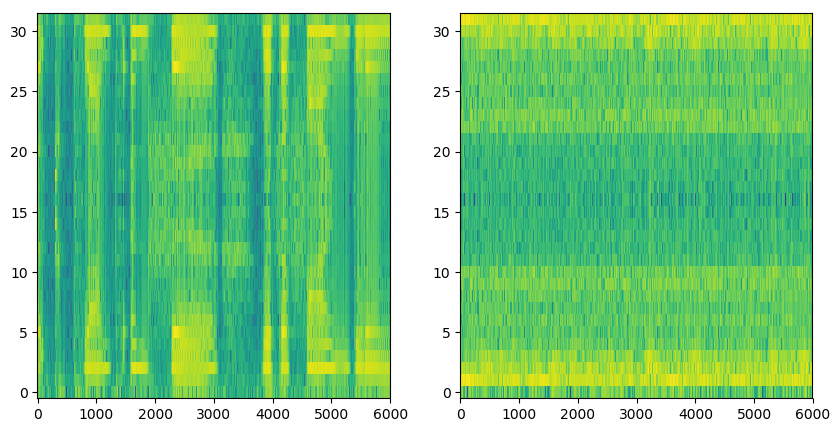

In [253]:
_, ax= plt.subplots(ncols=2, figsize=(10,5))
ax[1].imshow(y1a', aspect="auto", origin="lower")
ax[2].imshow(y2a', aspect="auto", origin="lower")
;

In [254]:
g1 = GMM(3, y1a, kind=:diag)
p1 = GMMprior(g1.d, 0.1, 1.0)  ## set α0=0.1 and β0=1, and other values to a default
#v1 = VGMM(g1, p1) ## initialize variational GMM v with g
em!(g1, y1a)

g2 = GMM(1, y2a, kind=:diag)
p2 = GMMprior(g2.d, 0.1, 1.0)  ## set α0=0.1 and β0=1, and other values to a default
#v2 = VGMM(g2, p2) ## initialize variational GMM v with g
em!(g2, y2a)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.542241e+05
      1       9.379050e+04      -6.043356e+04 |        3
      2       8.513346e+04      -8.657039e+03 |        3
      3       8.234051e+04      -2.792954e+03 |        3
      4       8.155074e+04      -7.897672e+02 |        3
      5       8.121891e+04      -3.318322e+02 |        3
      6       8.108883e+04      -1.300738e+02 |        3
      7       8.103376e+04      -5.507782e+01 |        3
      8       8.100052e+04      -3.324020e+01 |        3
      9       8.098064e+04      -1.987506e+01 |        3
     10       8.097364e+04      -7.005168e+00 |        3
     11       8.097205e+04      -1.587612e+00 |        2
     12       8.097078e+04      -1.265483e+00 |        3
     13       8.097015e+04      -6.329778e-01 |        3
     14       8.096938e+04      -7.728046e-01 |        2
     15       8.096923e+04      -1.450417e-01 |        

┌ Info: Initializing GMM, 3 Gaussians diag covariance 32 dimensions using 5992 data points
└ @ GaussianMixtures C:\Users\s151781\.julia\packages\GaussianMixtures\bTNkf\src\train.jl:78
┌ Info: K-means with 3000 data points using 16 iterations
│ 30.3 data points per parameter
└ @ GaussianMixtures C:\Users\s151781\.julia\packages\GaussianMixtures\bTNkf\src\train.jl:139


10-element Array{Float64,1}:
 -1.0036255329561838
 -1.0036255259924096
 -1.0036255259924096
 -1.0036255259924096
 -1.0036255259924096
 -1.0036255259924096
 -1.0036255259924096
 -1.0036255259924096
 -1.0036255259924096
 -1.0036255259924096

In [255]:
avll(g1,y1a), avll(g2, y2a)

(-1.3217560968466067, -1.0036255259924105)

<source src="data:audio/wav;base64,UklGRkDuAgBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQTuAgC7wzW+hPtRvnu0Xr5+VFG+tRw1vvaSJ74mZBG+FyL0vYog5b1T2sO93dBpvaZ7/Lux6z4937G/Pej4Bz6AXzo+yppdPk6Yhz6taJ8+OcKxPrnNwj73o8I+oDHAPjEjuz6VM7g+LXSwPjC8nz5aPF8+Ke3iPZ6PIT01/gW97fc0vfneGr2qyi293Q2cvcsBI740w4K+/vKUvjYilL4ndYG+qh4tvoLZ8b1jAY+9V7ONvUzMp73ENGe9qWMSva0txrkqKhU9FMOOPQzjtj3RlYc9BqcsPYszBD2OkS07UJLSvKBKY73IeKe9sNykvZYHy714K+O9Yfb7vRMfFr5LZTe+hPtRvu1iVr7C0VG+Gi0yvktOFb7X+/q9EBTYvTo+wb1nb7i9lGN9veAFkLznYyk9vJXyPexmMT4aFmY+bSuEPiBnkD42Y6A+vb2uPhc3vz4iNcc+oInDPi8rxT49cbw+VP6mPpoMgj7/RBE+lA+BPa56ILtoBEK98zcavU4BJL1gYZy9V5wWvtONfL5nspy+QXifvgvpkr50vWS+oxARvj3es70dNJW9Ek2vvfcQur3Baou95ukYvYNe8zuNaIA9use7PcYVvT2wspE9slJaPQanLD2kc6o84PIavFzg07yF4Cm9pi6WvcGYz72Rx+W93qL7vdP4HL6bMDm+7rJPvg32Ur69ekq+JSs6voItG773ewW+V0jtvYMSyb3dpoC9ZuYNvDIGaD04xAk+v5xVPls2gj5MoJE+5e+hPhsnqz6U474++1LNPomk1T58Bts+WmTGPnmQpz46qWI+8g3dPfpYKz2BalI8vLsGPLPiTDt5kii9FBvmvY/5Wb54/6G+CgC1vlccrL7OCom+FO1Mvq4OGb6zEfe9ZooKvu3kGL4AKhS+dSTVvZHHD71Cxhc9KIbHPY82DD5dLPY9use7PfbmfD2mQeE8jNenPCkAgjwL5xE97QoqPaMMjzzJN8S8KumxvWwxC76I6z2+3Q1HvkIeRL7Dui++VfwjvqFwHr7Znx2+8TsgvhnGFr7SkQG+KYKWvaTTL7y2WZI91LMMPpwCSz7FWng+Lq2HPl3tlj7N+5s+hI6vPsRzxz7VGNA+UsXPPnufvz4rZZg++RtOPp4kqz03HLo8FVNXO2hADjvhDCY8o7wRvTul3L2NqWC+ikynvuTFt76J/K2+wRSLvraDUL4JiCm+fIYavsQKKb5pqDq+jSsjvh3J9L1Qz1q95c79O+IjRD0qv549F8qcPVFJlT3pMWA9bVccPQbktDxdDdQ7jkXZO38iizy9D6081iVAPFt5uLwG/629YOMJvsQKKb7fRh6+TgH6vXn9nr22GC+9mNUrvZ/jR73bAjO908s/u8hOlD0kljA+Il+GPowtpj68FbI+vBWyPgGTsj4szLM+7U23PkkAnz6pt2c+LI0qPmUMzj0ecZ09xa6hPYwBOz2k0y+8jifzvR8Cd77XaJ6+IeWiviV9i75uFmS+gkQ9vojrPb4Er1++IFJwvpinaL519ju+WYHEvR7zsbzOYAs9HnGdPWtMsz001Mg9i13tPYIW+j0qVP49QSLKPVfwlT1akIg9TkKHPZFvjj182m89UYbzPMimFb385f69Cz8+vnZdV76/ykO+uQwhviNdA74uWwu+21YyvuwSXb6l9Wm+sSxJvkGgBr5EgVm9XudpPNAuQj2aHXM9lxaPPX1BtT3JtQQ+hgY7PrdVYj7xJoE+KAaHPmHdgj6Py2s+/8JOPlMuQz6hQjA+37EUPh4G/T3Wasw9FMOOPaPPBj1zmyq8Hckevdcpab3p9IG9+xNtvXLvgr3kG7i9Khf2vZPSI75kUTO++OIgvgQaAL5lz8W9p5Wxvf23ur1o1tO9rwrpvTH3zb0aV3C9NiiZvMlwIzzI9pI8EOsqu0Pdtbz6RTa94hBPvTfMPL0dyR69ByXmvJj/vryMsb28venCvB7zsbwgrnO8TXLtuqMMjzzER1w93BHNPVa3Ez4AE0g+V5xsPrhPhT5MSI4+mxuaPi7EqT59l7U+tHa7PkIJpT7fL1I+AfzQPUN9MDzHaY284QwmPGzwAD3KxMk8jrx8vXn9Sb4ISaC+vou6vrwsqb5MM26+DHgVvrKq2710KAW+SMVEvihJar66il6+mBIJvoBjvLwOHI49z1wFPismDz6qcgE+GZjTPVYe2j27Fwo+RXkmPkbgQT4t9EU+8b04PtwRIj4mTfA9VOmHPY0+wzx0Fbu8B/tSvQBYrb3DOMK9QOXBvVro370pBAS+ntArvlq6Rr4n4k6+NIBJvr+zIb5yhOK9c1aevcQ0Z731QoO9kTKGvSvlVr2pYxK9hd7dOjwfFz01poQ9F8qcPY7PcT1ElE49ThQZPfNKDz2Lmh89no8hPYXzHj2Cvvg8vLsGPNS3jrywcS69pvFjvYCgRL10UkO91PQWvfvW5Lz71uS85ukYvXmSKL0Rex29PAwivZduEL1ERNG8iuOGvK56ILujHwQ8g17zO09kFjwSa5U7yDCuux9ufrtAb4S7ox8EPFo4hzzJcCM81kuqOzWuCLzi08a8nRURvYsgD70Uc+e81tlrvAR2A7yNBWS8sDSmvLyCp7yY7Em8EmuVO8j2kjyPDPo8W2IaPeBVDT358Q89Z7AbPeIjRD0OHGQ9iChxPQoVgD2LyI09F2OBPbj5Wj1byTU9VLsZPb9E/zw3HLo8K864PKRzqjz8dl88yrAYO3VpYbypYxK9ScE+vZk8R71ctkC9gKBEvRNJVL1jxFy9EeaTvc8fqL020Je9zriMvQ4Jb70lPla97l5QvSU+Vr2HrmC9qzFJvaQjLb0psAS97bqsvKTmpLwSpbC84AWQvL49abwqobi7nmHbOSHu6DtFS2c8XudpPOH5sDxRhvM8q0Q+Pblgdj1U6Yc9O02FPWA3iT2pC5E9Kr+ePbQguz3gGNs908rZPVMXzD1iBcA9YZ6kPVfwlT1Lomo9H6pKPXoMOT1mSQA9+S6YPNPLP7sTDMy8sHEuvaMniL3rwri9Cm3XvV3v7b1nnfy90VT6vcUG+b1/Of+98dQEvkBQDb591hO+DxgIvoog5b00l8C9ef2evThwir2aCn69aWtdvRLiOL1dR++8XM1evEm/8jrJcCM8ctSJPGZJAD0d3BM9hlo6PQcOSD3jil89jWiAPXYzmT2xgMg9CxH7PR/YDT7kCBw+28EoPgQDND46kkA+OUJHPu4dRj4Dszo+sYAdPgVq+j3lWMA9JBiePeOKiT3cfEM9dUP3u468fL2yqtu92u8WvhzNJL6sbia+MBIgvri8J75ObEW+pkVjvib5cL7Phm6+nudNvqxuJr71Kwy+PqzqvbWx6b3Ipuu9tErOvepbnb36RTa9+Rxfu4twjDya8988HdwTPWEJGz0r+Es9jWiAPW3spT3KHMs97GbcPRr/7j2wR/E9pMsAPkPCET6K9iY+uI45Pux9Uz5Y7GU+Sf5xPr+zdz5y2GE+3sg2Pjjb1j2+oFs9eD4CPSw11DzK7lw9+yZiPVo4hzw+2li9LAsSvmW4Tr6300m+aEEfvkDlwb27w4q9xz/QvceqG77usk+++wBRvkIHIr43N7O9NiiZvJosvzspxyK8ML4gvWJdQb34oZK8o88GPQncqD1IMOY9aRPcPUwJsD0IdWM91tVCPfA/fD3aQ5Y95PGkPWbeiT2vHQg9vf1zu7xYFL0XIh692psXvXgrDb1VqCS90YJovcLRpr2o/My9wZjPvShJv70JBry9GPSvvfACnr2w3KS9iOuSvQGRhL245mW9SFojvQTGAL2LSqK8+I4dvKahZryNBWS8OEp2vIBQR7xxp4m7eg6FunS1NTy8qJE8doNsPNkzbDu8S

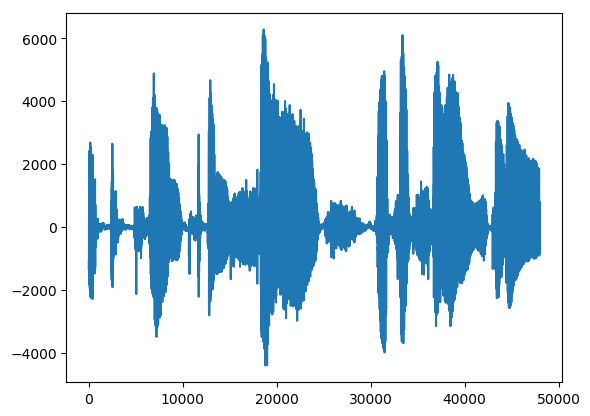

In [256]:
plt.figure()
plt.plot(x1)
audioplayers(normalize(x1, "max"), fs=fs1)

<source src="data:audio/wav;base64,UklGRkDKCABXQVZFZm10ICgAAAD+/wEAgLsAAADuAgAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQTKCADZZIE+FMVuPndzYj572XE+dAOGPqeNhz5LtX8+Fyt+Pihniz4szZo+SEWjPuPjpz79qKg+yR6nPmS9qz7L0a4+4+OnPq9Zpj4YIbE+AA+4PrO/tT7NhLY+GtS4PudJtz6Z+rQ+AA+4PoHouz6B6Ls+Tl66PgLCvz7Tnc0+VSrZPom02j48Zdg+ibTaPqUs4z70Lu0+j83xPnUI8T6PzfE++JT8PkpzBD+9EAQ/VvwAP6RLAz/LTAg/pv4KP0CdDz+O7BE/DRMOP//WCT/LTAg/19UEP+NeAT8xrgM/SnMEPxJa/T51CPE+p9/qPnGi4T7uFdY+VHfRPqHG0z67i9Q+VHfRPjqy0D6hxtM+VHfRPuqvxj7PN74+aCO7Ps2Etj5Mq7I+Tl66PmnWwj5p1sI+HjrIPjxl2D4Kjt4+hwHTPmuJyj5SxMk+6q/GPmuJyj7UUNU+b+/ZPtRQ1T4g7c8+nWDEPhrUuD4Cwr8+nxPMPtHqxT6Z+rQ+yR6nPizNmj7dypA+XPGMPlzxjD6pQI8+94+RPqlAjz4oZ4s+wwWQPsW4lz7FuJc+94+RPsFSiD7ZZIE+2xeJPvv1oD4y5rE+l0etPmIKpD5iCqQ+yR6nPhZuqT59gqw+sQyuPkr4qj4Uu6E+94+RPhcrfj6ssGs+FMVuPuSgfD4mtIM+S7V/PuLtdD4mtIM+RN+TPt3KkD7zKYI+rmNzPnXAWj5rQTQ+ZigdPsnWED6Ge/M9UT7qPcnWED4AxyE+Mp4bPmYoHT6bZSY+NgQrPjpqOj4KRkg+oX49PmmOLD5o2yQ+/WASPoIV5D2puq89BJ2EPf0e9zyFP1y8rCl8ve142r3Dbf+99UT5vbKSDb7vmzW+kFNRvi5YZb5o+32+giaFvgFNgb5o+32+zVx5vi5YZb5efFe+kgZZvieMRr64qyS+5GkHvh9Q1L16Mqm9qKOTvWu6RL1XzpY7jic5PQFuaj062o09qbqvPd73uD1FDLw9F5vRPX+v1D2lVKA9VYQgPckUyDvSt6u8a7pEvQxSh70MUoe9D9hvvawpfL2wb7K9vwfwvUnLAr7lHA++7egtvr93Q74l2T6+Jdk+vlzJT77zAUW+HQ0gvhVBAb5Ujd29sG+yvUX1n72wb7K9sG+yvQxSh70540q9a7pEvdY0V72sKXy9ejKpvbyh4L1+CAy+IXMvvo6gSb5WsDi+tEUVvhmnEL66Xiy+8U49vlawOL4l2T6+kFNRvvkaXL5i4ma+6TqIvnAto76nHbS+3Vq9vpNxyr58X9G+FEvOvmKa0L5+Etm+sZzavpfX2b7NFOO+AlLsvhwX7b7qP/O+7PL6vtF68r4aZOW+TDvfvkjVz77bp7W+10Gmvu9Tn77r7Y++aGGEvuk6iL64Y46+bMeTvu9Tn74lkai+CRmgvp6ejb7nh4C+zVx5vpnSd76bhX++NdeCvk+cg75oYYS+0HWHvuk6iL5QT4u+O/CZvlrOsb6rg8O+EpjGvqnQu77zua6+8Qanvr18pb6/L62+qdC7vsVIxL7FSMS+YOfIvq/p0r7JrtO+fF/Rvsth2761Auq+nfDwvh7K9L6Hkf++kvEFv4ZoCb9GVQu/07cLv6y2Br9UB/6+BAX0vre18b7qP/O+n6P4voS1Ab9sowi/B0INvyEHDr9GVQu/ORkHv7g/A78r3QK/nnoCvwa4+76DK/C+6Yzrvhpk5b7lJty+Fv7Vvnxf0b6Tccq+ePnBvtn0rb6gUZW+6TqIvmhhhL7LqXG+92dUvig/Tr73Z1S+XnxXvvkaXL6XH3C+giaFvtB1h75PnIO+NdeCvmhhhL43ioq+O/CZviPeoL6iBJ2+CRmgvgkZoL45PZK+trCGvhsSgr6XH3C+LlhlvjALbb77zWO+xZBavpcfcL5oYYS+NdeCvv4zc74spV2+WhZIvobUKr4X9Ai+isrmvYZk170XhLW9D7iWvUX1n73iRqy9RfWfvawpfL0AQDK9x5wZvVwiB72ZFJO8hT9cvKis0LxvCbi8TJxDvDVmn7wqSw29pF1dvUlbr73teNq9WPPsvbRFFb7xTj2++RpcvpuFf74feJG+09uWvog/nL7XQaa+vy+tvoylq77XQaa+bnqbvtEoj77QdYe+T5yDvmZIdr5gL1++jqBJvoiHMr6ykg2+hmTXvX6YuL0MUoe9bwm4vBH0LTyK2MU8hlsaPcfKUT2W81c9XFA/PY4nOT1kHF49nb92PfHVLD2046A8SpdGPNEtubpcIge9D9hvvQxSh71F9Z+95ay7veJGrL1Bj5C9Ex6mvVAnzr3lrLu9PSmBvZXFH73St6u8yA9LO/0e9zxs6Hw9FDXCPSyFBD44tzI+QTZZPhISZz5HT3A+fYx5Pqywaz6nl1Q+QTZZPhZ4dj7zKYI+SQJ4Pt6HZT6nl1Q+bfQ7PmmOLD6dGC4+aNskPpVMDz79YBI+mbIePvutCj5347U9lvNXPe6GuTzZVRK8vuJ0vMkUyDvEe948wP4yPam6rz3+Exo+cVpLPhBfXz4WeHY+3cqQPq9Zpj7nSbc+0erFPruL1D4mBuc+d7v4Pjw3AD8X6QI/WK8IP9mIDD/lEQk/pEsDP1+p/z6rRfo+KLnuPr/x4z7wyN0+hwHTPgLCvz4y5rE+y9GuPpdHrT6vWaY+raaePqvzlj7dypA+kHuOPqvzlj4Wbqk+6fy+Pm080j6/8eM+DvTtPii57j4Qp/U+vRAEP6b+Cj/zTQ0/58QQP1wVGD+SUiE/IGgpP9XLLj8IVjA/Yi4vP6FBLT/hVCs/bAQkPwM9GT/bOxQ/NBQTP2brDD+xhwc/WK8IPzJhCz/ZiAw/QJ0PP9s7FD82xxo/klIhP9FlHz8oixY/TtkTPwM9GT/RZR8/LPElP6FBLT8IVjA/LqQtP2IuLz/xQzc/JM44P8lCMj/JQjI/FpI0P4h8LD9sBCQ/n44lP4bJJD9QjBs/TtkTP7M6Dz8LYAY/Kx/+Pisf/j5W/AA/q0X6PltD8D6PzfE+QzH3PnUI8T4O9O0+d7v4Pips9j5xouE+o3nbPnNV6T7aaew+JFPfPr0+3D4mBuc+WZDoPkDL5z6PzfE+q0X6PqmS8j7ApOs+WZDoPm/v2T4Edcc+UBHCPjZMwT42TME+g5vDPjSZuT5iCqQ+XqSUPlzxjD5AeYQ+8ymCPnQDhj4N74I+SQJ4Pn2MeT4mtIM+draNPq2mnj5mcLM+zze+PudJtz4YIbE+fzW0PhrUuD61cr0+NkzBPmgjuz59gqw+x2ufPqlAjz7koHw+RZxoPnMNUz5rQTQ+ZHUVPubD1z1kHF4911AVPNK3q7xcIge94U/pvH6h9bzOaDi9zmg4veFP6bzSt6u8Rf7cvCpLDb3HnBm9Rf7cvM4jP7vuhrk8jic5PQSdhD2puq89f6/UPU3Y2j2CFeQ9vLj8PYZ78z3e97g908WKPSt5RT2046A8WtiQuwtbxLxrukS9rCl8vaijk73teNq9hCEjvsPdUr4A53q+H3iRvqS3pL4Nf6++dJOyvlyBub4SmMa+LhDPvq/p0r6xnNq+5Sbcvnxf0b5GIsi+LF3HvvnSxb4o97e+ivKjvlICk76c64W+/jNzvi5YZb4spV2+jqBJviMmN76KOjq+8wFFvsEqS775Gly+lx9wvpuFf74dxYm+bMeTvm56m75wLaO+vy+tvkAJsb5azrG+qdC7vuHAzL6VJNK+k3HKvpNxyr6v6dK+43PUvv041b6ZiuG+6YzrvrUC6r6BeOi+6YzrvumM676BeOi+NCnmvk7u5r5os+e+59njvjJ23r7+69y+y2HbvmRN2L6xnNq+MnbevrGc2r4ww9a+y2Hbvkw7376xnNq+MMPWvrGc2r7LY

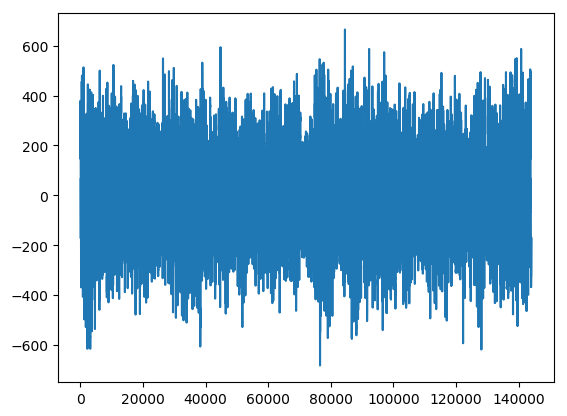

In [257]:
plt.figure()
plt.plot(x2)
audioplayers(normalize(x2, "max"), fs=fs2)

In [258]:
using ForneyLab


In [259]:
log_br(x::Array{Float64,1}) = log.(x)
exp_br(x::Array{Float64,1}) = exp.(x)
#logsumexpy(x1::Array{Float64,1}, x2::Array{Float64,1}) = log.(max.(exp.(x1) + exp.(x2), 1e-5))
#logsumexpx1(y::Array{Float64,1}, x2::Array{Float64,1}) = log.(max.(exp.(y) - exp.(x2), 1e-5))
#logsumexpx2(y::Array{Float64,1}, x1::Array{Float64,1}) = log.(max.(exp.(y) - exp.(x1), 1e-5))
logsumexpy(x1::Array{Float64,1}, x2::Array{Float64,1}) = log.(exp.(x1) + exp.(x2))
logsumexpx1(y::Array{Float64,1}, x2::Array{Float64,1}) = log.(exp.(y) - exp.(x2))
logsumexpx2(y::Array{Float64,1}, x1::Array{Float64,1}) = log.(exp.(y) - exp.(x1))


logsumexpx2 (generic function with 1 method)

In [296]:
fg = FactorGraph()
@RV p1 ~ ForneyLab.Dirichlet(5*ones(3))
@RV z1 ~ ForneyLab.Categorical(p1)
@RV x1 ~ GaussianMixture(z1, constant(means(g1)[1,:]), constant(inv(diagm(g1.Σ[1,:]))), constant(means(g1)[2,:]), constant(inv(diagm(g1.Σ[2,:]))), constant(means(g1)[3,:]), constant(inv(diagm(g1.Σ[3,:]))))
@RV xe1 ~ Nonlinear(x1, g=exp_br, dims=(32,))
# @RV xe1
# Nonlinear(x1, xe1, g=log_br, g_inv=exp_br, dims=(32,))

@RV x2 ~ GaussianMeanVariance(means(g2)[1,:], diagm(g2.Σ[1,:]))
@RV xe2 ~ Nonlinear(x2, g=exp_br, dims=(32,))
# @RV xe2
# Nonlinear(x2, xe2, g=log_br, g_inv=exp_br, dims=(32,))

@RV xe = xe1 + xe2

@RV y ~ GaussianMeanVariance(xe, 1e-1*Ic(32))
placeholder(y, :y, dims=(32,))
ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 15508709579583786026 -->
 15508709579583786026 
 
 clamp_6 
 
<!-- 16615468181340553385 -->
 16615468181340553385 
 
 placeholder_y 
 
<!-- 9677051585014978801 -->
 9677051585014978801 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 16615468181340553385--9677051585014978801 -->
 16615468181340553385--9677051585014978801 
 
 y 
 1 out 
 1 out 
 
<!-- 9386789676314522619 -->
 9386789676314522619 
 
 GM 
 gaussianmixture_1 
 
<!-- 9386789676314522619--15508709579583786026 -->
 9386789676314522619--15508709579583786026 
 
 clamp_6 
 1 out 
 7 m3 
 
<!-- 8709404474357117562 -->
 8709404474357117562 
 
 Cat 
 categorical_1 
 
<!-- 9386789676314522619--8709404474357117562 -->
 9386789676314522619--8709404474357117562 
 
 z1 
 1 out 
 2 z 
 
<!-- 3784467712481776988 -->
 3784467712481776988 
 
 clamp_5 
 
<!-- 9386789676314522619--3784467712481776988 -->
 9386789676314522619--3784467712481776988 
 
 clamp_5 
 1 out 
 6 w2 
 
<!-- 12147887642298467097 -->
 12147887642298467097 
 
 clamp_3 
 
<!-- 9386789676314522619--12147887642298467097 -->
 9386789676314522619--12147887642298467097 
 
 clamp_3 
 1 out 
 4 w1 
 
<!-- 12269493478062566139 -->
 12269493478062566139 
 
 clamp_7 
 
<!-- 9386789676314522619--12269493478062566139 -->
 9386789676314522619--12269493478062566139 
 
 clamp_7 
 1 out 
 8 w3 
 
<!-- 14632044661720195708 -->
 14632044661720195708 
 
 clamp_4 
 
<!-- 9386789676314522619--14632044661720195708 -->
 9386789676314522619--14632044661720195708 
 
 clamp_4 
 1 out 
 5 m2 
 
<!-- 13819246148096644174 -->
 13819246148096644174 
 
 clamp_2 
 
<!-- 9386789676314522619--13819246148096644174 -->
 9386789676314522619--13819246148096644174 
 
 clamp_2 
 1 out 
 3 m1 
 
<!-- 4869322700436314926 -->
 4869322700436314926 
 
 clamp_8 
 
<!-- 10379693155340732283 -->
 10379693155340732283 
 
 Dir 
 dirichlet_1 
 
<!-- 8709404474357117562--10379693155340732283 -->
 8709404474357117562--10379693155340732283 
 
 p1 
 1 out 
 2 p 
 
<!-- 10988947480027190576 -->
 10988947480027190576 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 10988947480027190576--4869322700436314926 -->
 10988947480027190576--4869322700436314926 
 
 clamp_8 
 1 out 
 2 m 
 
<!-- 14977146851773198542 -->
 14977146851773198542 
 
 clamp_9 
 
<!-- 10988947480027190576--14977146851773198542 -->
 10988947480027190576--14977146851773198542 
 
 clamp_9 
 1 out 
 3 v 
 
<!-- 4420360126582467420 -->
 4420360126582467420 
 
 clamp_1 
 
<!-- 10379693155340732283--4420360126582467420 -->
 10379693155340732283--4420360126582467420 
 
 clamp_1 
 1 out 
 2 a 
 
<!-- 14937452438397371377 -->
 14937452438397371377 
 
 + 
 addition_1 
 
<!-- 9677051585014978801--14937452438397371377 -->
 9677051585014978801--14937452438397371377 
 
 xe 
 1 out 
 2 m 
 
<!-- 17681942584017954732 -->
 17681942584017954732 
 
 clamp_10 
 
<!-- 9677051585014978801--17681942584017954732 -->
 9677051585014978801--17681942584017954732 
 
 clamp_10 
 1 out 
 3 v 
 
<!-- 719883500256442590 -->
 719883500256442590 
 
 Nonlinear{Unscented} 
 nonlinear_1 
 
<!-- 719883500256442590--9386789676314522619 -->
 719883500256442590--9386789676314522619 
 
 x1 
 1 out 
 2 in1 
 
<!-- 14937452438397371377--719883500256442590 -->
 14937452438397371377--719883500256442590 
 
 xe1 
 1 out 
 2 in1 
 
<!-- 8729782829233334165 -->
 8729782829233334165 
 
 Nonlinear{Unscented} 
 nonlinear_2 
 
<!-- 14937452438397371377--8729782829233334165 -->
 14937452438397371377--8729782829233334165 
 
 xe2 
 1 out 
 3 in2 
 
<!-- 8729782829233334165--10988947480027190576 -->

In [297]:
algo = variationalAlgorithm([xe, x1, x2], z1, p1, ids=[:x, :z1, :p1], free_energy=true)
source_code = algorithmSourceCode(algo, free_energy=true);
source_code = compatibility_fix(source_code)
eval(Meta.parse(source_code));
#println(source_code)
;

In [299]:
# Prepare posterior factors
marginals = Dict(#:p1 => vague(ForneyLab.Beta),
                 #:p2 => vague(ForneyLab.Beta),
                 #:z1 => vague(ForneyLab.Bernoulli),
                 #:z2 => vague(ForneyLab.Bernoulli),
                 :xe1 => ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=2*ones(32), v=1e0*Ic(32)),
                 :xe2 => ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=2*ones(32), v=1e0*Ic(32)),
                 :y => ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=ones(32), v=1*Ic(32)),
                 :x1 => ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=0.5*ones(32), v=1e0*Ic(32)),
                 :x2 => ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=0.5*ones(32), v=1e0*Ic(32)),
                 :p1 => ProbabilityDistribution(ForneyLab.Dirichlet, a=ones(3)),
                 :z1 => vague(ForneyLab.Categorical))

x1_pred = Array{Float64,1}[]
x2_pred = Array{Float64,1}[]
z1_pred = Array{Float64,1}[]
z2_pred = Float64[]

#messages = initx()

# loop through samples
@showprogress 1 "Processing..." for k in 1:size(ytota, 1)
    
    # update data dictionary
    data = Dict(:y => exp.(ytota[k,:]))

    # Execute algorithm
    n_its = 3
    F = Float64[]
    for i = 1:n_its
        #stepye!(data, marginals)
        #stepx1!(data, marginals)
        #stepx2!(data, marginals)
        stepx!(data, marginals)
        stepz1!(data, marginals)
        stepp1!(data, marginals)
        #stepp2!(data, marginals)
        #stepz2!(data, marginals)
        #stepz1!(data, marginals)
        #stepz2!(data, marginals)
        #stepp1!(data, marginals)
        #stepp2!(data, marginals)

        # Store variational free energy for visualization
        #push!(F, freeEnergy(data, marginals))
    end
    
    # save separated signals
    push!(x1_pred, ForneyLab.unsafeMean(marginals[:x1]))
    push!(x2_pred, ForneyLab.unsafeMean(marginals[:x2]))
    push!(z1_pred, marginals[:z1].params[:p])
    #push!(z2_pred, marginals[:z2].params[:p])
end
x1_pred = collect(hcat(x1_pred...)')
x2_pred = collect(hcat(x2_pred...)')
;

Processing...100%|██████████████████████████████████████| Time: 0:02:11


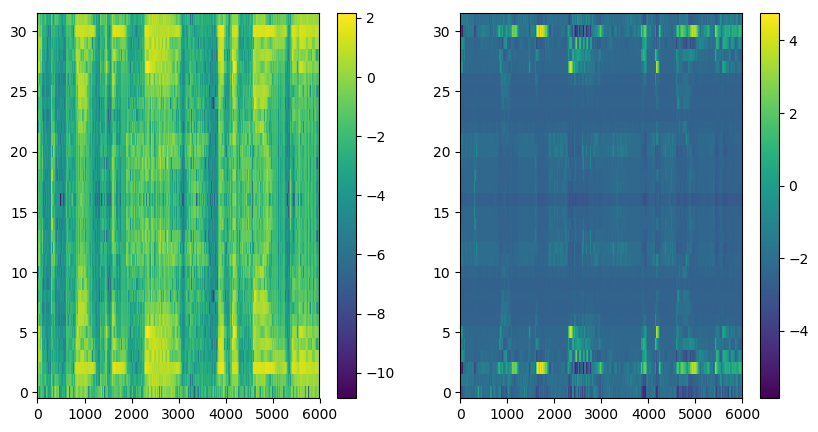

In [300]:
fig, ax= plt.subplots(ncols=2, figsize=(10,5))
cmp = ax[1].imshow(y1a', aspect="auto", origin="lower")
fig.colorbar(cmp, ax=ax[1])
cmp = ax[2].imshow(x1_pred', aspect="auto", origin="lower")
fig.colorbar(cmp, ax=ax[2])
;

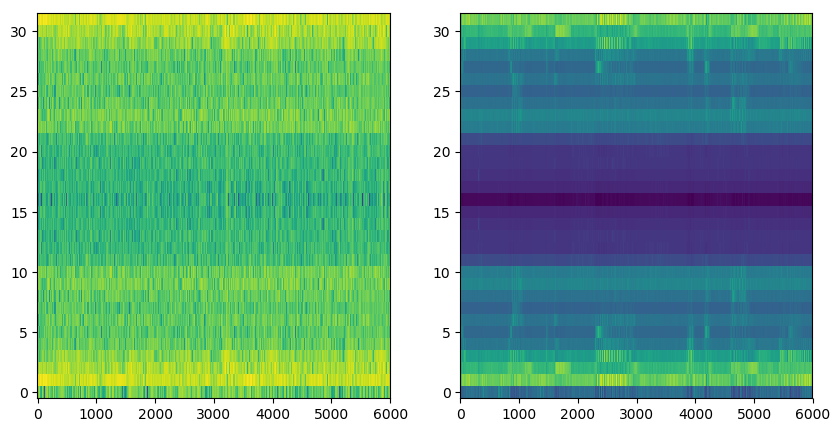

In [301]:
_, ax= plt.subplots(ncols=2, figsize=(10,5))
ax[1].imshow(y2a', aspect="auto", origin="lower")
ax[2].imshow(x2_pred', aspect="auto", origin="lower")
;

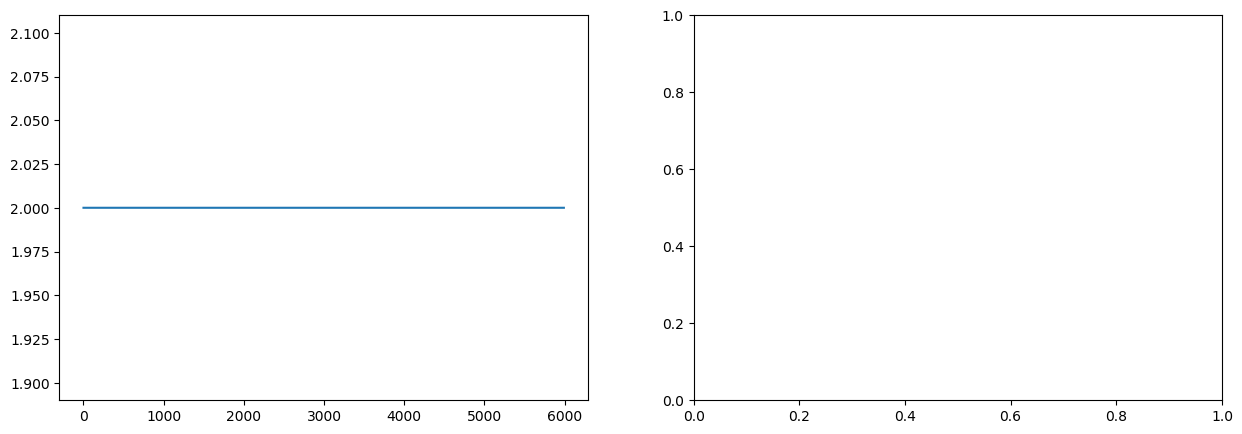

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062313FD0>

In [302]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot([argmax(z1_pred[i]) for i = 1:length(z1_pred)])
#ax[2].plot(z2_pred)
#[argmax(z1_pred[i]) for i = 1:length(z1_pred)]

In [303]:
#y1_pred = realimag2fftcoefs(collect(hcat(x1_pred...)'))
#y1_pred = warp_ifft(y1_pred, pole_location, step_size)
#y2_pred = realimag2fftcoefs(collect(hcat(x2_pred...)'))
#y2_pred = warp_ifft(y2_pred, pole_location, step_size)

# expand
x1_predi = exp.(x1_pred).*exp.(1im*angle.(ytot))
y1_pred = warp_ifft(x1_predi, pole_location, step_size)
x2_predi = exp.(x2_pred).*exp.(1im*angle.(ytot))

y2_pred = warp_ifft(x2_predi, pole_location, step_size)
;

In [304]:
#plt.plot(x1_predi)
#plt.plot(x2_predi)
#audioplayers(xtot, x1_predi, x2_predi, fs=fs_desired)

<source src="data:audio/wav;base64,UklGRkB3AQBXQVZFZm10ICgAAAD+/wEAQB8AAAB9AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQR3AQAXLxC+z7Zpvpv5Nb7BxRS+yVvfvUVPfL38sEc9gVMKPp4fZT6sOp8+RpLDPsjZwD5W47o+J/2cPmR09T0v+uG8ABMfvdIXpb07sH++OCiXvvv6Nb44zZu9eM6Yva0/Er1fmx09L+SrPe4cPj3Td6g79Y9svcGes72gmOG9KaAYvpjcUr7g8k++VXYXvuUq2b3Ba7S98BKWvE0V6z0WIGg+qiaSPtcnsj4xVMc+Y+TFPuDxqD69wBs+2NTxu1vSK71/F5i9vD17vvfDo77n4mO+8qS2vXTgrb10upW9vXA4PH9ivD1+8JY9nkMiPULRnrt0sj+9+GfJveM3A77Zhzq+DQNXvrM9OL6sCAi+sZXHvbpjMbzNJAw+UVOEPtSsoD7E7b8+lADZPjDuyz6qLmI+9XYmPSq+FjzI8Bi90mNgvt28t75p/Iu+A/EWvlMvCr6i3BS+HQoavQEv0D0Iq/89vKxwPfizijwG9Qs9jrqmPCbCrr3Z1zq+jNJEvjVxJL4keiC+3EEZvjBXnr2MpI49GgVMPhV4iz4g558+QLHGPmZX0j61LJs+IPC5Pav9lTn/17Q7GYnlvXvDpb5c6K6+oVxTvlTMHr71mze+1FzzveH14zuZzZg9n3yTPbNvHD2AEQ08FFl1PPSTUjyR6Kq94BgpvteY+r0ZPju9XzhLveXiVbvRpDA+MiaoPh8xsz4ljbg+wQigPhDOIj4g8aU9z/JTPUZa+r372qC+scqNvkacQL4qYV2++HlsvhJk0L1r9h49hYK2PZHD6z0FNvk9WjKdPVZphz1ds349YJgfvW9DQb4m1Ua+HMIFvp7XM75TKmy+RjEHvjgZTzxV2ng92D26PcCMOT4EqYI+i0mDPsGPVD6ugzA+nTT+Pd5ZkT3xbRC83llsvRsUeL2MM7K9Zi0lvnssI75Xrci9qmi8vUkO6b25a3+9WxlBPIrrMbp3VjG9LP9DvX5R6bw4Y8C8yXmxvHVINLt5PVw9ZmgYPgJFbz52tZA+wOSpPkjMvD4cb10+Vm88PAl83js3LbM8YPhIvo/NvL5g8nK+dWXcvZbBRL5zn12+/pvOvFIVBT4EjQA+pJjcPXo8Kz7HFUc+/HAiPkS9jD0YLKG8DyWqvVi5yL26PQi+6EhIvjMYSL690Oe9d5x2vfPRhb3/iQe93rIZPc3ImD1w7EI9tIwWPRM6Iz12ePo8nF+evDZ0Wr19ITy9syPvvG29Er15zyi9GHsOvY9/fLz0kdU7UhQJPK29SbuupwW79bNwPKqtezsR28C8Q+kXvUARabyojWC8mO+ovOtARztuQAE9O+oRPY3LIT1TEmI9vn2EPcHQgz3EujY99mz+PN5srjyxd388neOGvOCDPL1jlki9KPNLvaiFkr0oW6C9Ln1uvTsOVb1AKly951kvve3xuLxGoaq8Qf5avI9sMTqm8lU8kjemPCPtPz3CPog9JVyJPUujoj18Htg9md/QPdIjqj2p2nM9GmcyPcUijzz7qcK8CXCJvXfc273twPu9SAf9vdNDBr63pBO+BRbqvTnfoL1asH29sqw4vYkKU7yfsCY8TInsPATsOD2tXGA9K3CdPfjN+j19jx0+HJc2Pk8AST4o1Ds+PEj6PcNEoz1OXjE9YVF6vXRoFr6T7ya+3KYqvtU1Zb7x9m2+/j0qvj428r0Zzum9xu6fvX7Q07tXrfA89JYiPYvTgj1k0Mo9iFTtPf3jAj4mTCc+cPBTPtYIdj6udmU+htXiPdV63Dwge1M9vX+dPMapEr735k++J+/CvQP7yr1nqU++0uQkvl9bpLzLzSW82hRBvXOvBz2OiOY9xPysPeHRRz3ahps9njuJPdkRpbsLRiy9cQUIvVe1cr1lJMq934HHveZXrr21qKC9TDiGvUnZL71YbZq84zRIvNWEdrwBssm7wMkpPM4rejzys/m76LGTuz0cLTykokE675GBvJZF3zqYr4E7isl6vKC5mLzmlDK877QhvCFiBLzrGwe6r07jOw+O5TuOvjs8hukfPHiPyjzZqSc9jOQCPWK/kTygYcs8prkOPdttqjw/CpE8t4bXPGwJkTxap6Y6fBP7OREFTbvFfRa8XxkQvOODHryLh/a7pHUmvL8viLv2IGy6uT3bujm90juoq907o3DyOwS4qjx/f6E8uRUgPLAyxzzr6u08fnY0PIqvADzeMdU8HSPQPOZwLjwI0xA8sAVSOzILqTokr5Q8kIm7O6IDg7znR+I6RTyOPL3EVrrK1sK7JZYDPDQ/szrRZ7Y7AIsmPBIvLDtIeyE7jBFaPDsFgDwAARs7hH8RPMzaTDyuOTw8zlTBPF2iyLo6ZJE8tPL0PNly1DtaB6s8SWicPMMzlbt9/ms8v/nEPKj4t7sMHI68kXQfOylYF7wQM0S8jqePO/gdALyFJiO79ZswPACm2Lxa+Da82j4PPTaVJDyygB69V96ivIolHj2vutY7sk05va6Cgjyi37M8f8dDvao/ITxQohA9G/Y2vWzkG7087vA8ds8gvHZAQr26KMe8BatsOg8e1rzddmC8Z9CCvMRz77zPfvo7IMpiPB0xRb2nppq8vr/xPLrtm7y4cQO9cV1iO98/R7qi6Ka8G8mYvEQiyDua4ku8Ix3yvMQpU7xLgY27j9Z+vH5R9rxO21i8xhomvG8TZ7xzjhG8FGmnuzRCarpED0K7Piphu4HWE7vWSow7K2tVusQh+LvaO5m62L7Luia8LLosKQC89vnuuxNNsbuJ1mW7HxDcOpENmDrwfVe4H8NhO505vjtvWYq7umlcu/lLbLuzBRW8uSUyvJNWI7yYOge853JsvCCbcbzEExi8dieCu6qi/rqmyGa7amHZO4RmPzyjY+E7JtqRO9AZDTyP+NM7cx4kO2+gczs/Bqk6dB+yOZ95gToomHe6duJ8ul2fBLtO4IM5qREzO8exSLsmhMq7zkXQu2lzDLxGUwa80nASvEz5mLt5esG5IXlaOyU8qDvIF5S5t/+XO8gjFTylxNs7+IHMufnwGDtobfk7AQMcOzJSO7uFx3Y75hbiO3Wgfjvm6Ii6sF+SOzpfzDtW9v87eOkPPADrQjzBxjo819owPDZQOTwbKQY8BjQJPNf9CjzdWSo7tTmeOwf7yzsilA08p89APAge/jvKXPQ78RcLPC218jvtO9Q7+N7dO7FfPTxVjyM8TU6aO0H28zv+bxY8JLL2O1zUZjzSvH48ZMY1PJ4TETzei0A8wx/BO2GtgjuNAL47QZFhu90NubtkewK8cOGLu2ansbu81me7TgNhO5bEcDuRUjg61wsJO0ZtOjs/mCK6FAPBu2KV77vH1Cu8SXgivEy3TbwE/oe88OKTvF7TfbyEho+8oKyXvHYSUrxByne8n4aGvP3NirwysYK8B5mdvBpjp7wcYKO8sFe5vKGqrLxUgaq8/TygvG3eurwW+HG8vLFQvK58j7yxnl+8qD9bvMu4OLxnvYO8LF6jvEvuo7zclJ+8OtB+vK2Khbzr74G8D7R7vE80c7wNDI68VpiVvNH8dLyHfji8r5p/vEljY7yaeSO8jH4XvB9mILz6QYC7WDAFvBtELrykpfO7xXF9u0yikLvsYHK7A3zfu3nYPrtvjP43F5YGu1T9vTr3LmA6Xy8vOyoTaTtfRoo6rANJO+pBQzuGWLK7Gh0WusPwgzqXDfQ6mtKgOqpKgDtpneo70NaMO4hIyTslITU8UscMPGiMUDw313I8v+MoPDIvQzzHsAw8lpQ7PF8yGDxrCyM8mORJPLBP+Dufq/c7xpsjPJOQZDw86x48J6lAPCwxfjxhQDg8WXcQPC16VzwATHM8W3GKPEi8gjx/tHk8PXhuPLExmzxGg448aMlIPOf8QzyiX

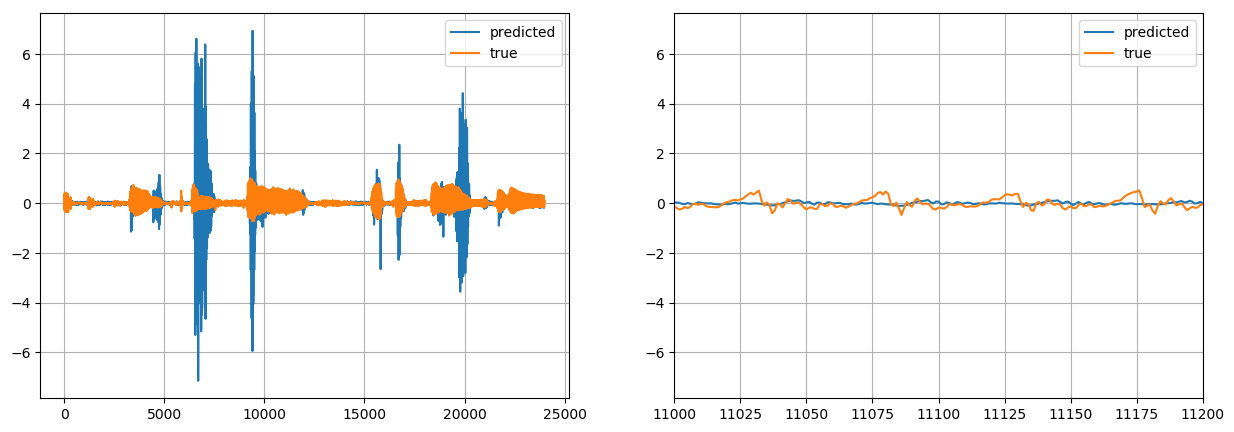

In [305]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(y1_pred, label="predicted")
ax[1].plot(y1i, label="true")
ax[2].plot(y1_pred, label="predicted")
ax[2].plot(y1i, label="true")
ax[1].grid(), ax[2].grid(), ax[2].set_xlim(11000, 11200), ax[1].legend(), ax[2].legend()
audioplayers(y1i, y1_pred, xtot, fs=fs_desired)

<source src="data:audio/wav;base64,UklGRkB3AQBXQVZFZm10ICgAAAD+/wEAQB8AAAB9AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQR3AQDwP2I82D/pPIV4AT36RxI9OEYSPez+JD2Ilzw9xo9TPehuYz2jkVM9bdsyPQtNJT1yjhc9cKEoPd4EJz12dCA9Bgn1PMC35zz7Res8d2EMPS9f9TyU38o8uwvRPKHyWDzRAo08JVKDPM7Wq7qV0Zu8v2HNvMtlh7x4EBo4S6smPC2WSrqVtia8rauXvMkxVLwxKJi7VS5kvHzRirxsUc68QGIlvcEfOb1pYDu9s9jsvHkm97y1+se8xEv6vHezE721Mxm9sC4/vW5bWL2EGE29PlJevT2aRb0EQR69+mHDvIFUuLxWQvS8pKHmvMy9wLyh/K+8xm8XvBzArLtag7G6cP4ivMv74ryplAS9sDaxvJhvu7uPeME7mGoCO7Or7rv58AK8wwjgO5Ozvzyi47c81omZPHd97zuOekY74MfPPAzYOz1wwFo9q64xPfUz/TwQlQ09o1tMPYq3gj3y74g9gRpfPZJBdD3qKoI9pySSPS2XiT0cMFw9liVGPWdnPD2hiDs9Uog8PeN/GT1TM988TPPePK1PGD184gk98DaIPCWRALs7moC73T0GO13CQDwpokA71vFTvCZ7Cr0xAy29Vd4Qva1HqLwCeLK8HKUEvXfSIb3kBjW9cmc+vQ18Mr258TG90vkrvQKKGL3ayxO9zVAJvRXBEr1+F9G84kzIvK2T07xsybO8PSrAvBsb07zItae89mLXvE0i17xRO8q8v0vKvJH5m7ylgGO8O8vcvCe/S71p9HS9FCxevZrqLb01Dtq8AOCrvHmvtLzXvhW9tB4avVm5FL1GhAm9dhC8vM7KXrxqS4O8wQ4ovJnw27tHRN67lymLNw2ijDxe3AI9oRwdPTxtHz1oMPo8AuL3PJOOHz2nz1M9+vWEPW2WiD3Vimk9K61NPZHxTj2s+4E9SvucPWyaiT38L1s9gP8WPSqNAz3OhQw9l+tHPeCskD3D65k9oI6OPR4JXz2xDk89AlQzPV56Pj2NxCw9R//6PDZpvzwERJw8COGSPM9hVjznJjM7HBnku+FRsbxxo8C8MEfBvJKS2LwoKRC9osJQvdjJgr1i1n696pdevZenQ726O1q9zp5+vU6Alb2DaY+9Umh4vXVbe73LDoe9S85rvVSVWr1HgTa9pKQzvcmdML3jXSy9iK8VvTkK6bzY2O+8irDbvBCNtLyuiZe8X22TvFEshLztdI+8NxwWvFqqnryDfSm8rM3wO900BTwdpko7ukxBvKcWm7tYArW7GbjjtomTpDzw/bw8gzreOyLlvrqShZI7k9e1PEsCGj1LAT09jXY3PeF8Cj3L5hU9SikjPSQZMT0U9Ss90NwlPdfkEj1kZvM8TNnMPOxDDD3I8RQ969wsPXyfKD34fBY9dPznPNf7njxoOAo8xQyYPCEBzjwn+w49C/4GPXAXozw7wEI8QUcAPIgOvjwUfgw93HYXPWkaCD3CSPM7YzcnO7JnBjz02hY8EzHSO44/E7v2apC7kMDKu5nOL7p+nRg7gpxru5f+abzREqm8rbiyvPbvh7zmiaW8te05vcouU72IaXC9foRjvc72Q73l6169LiyLvU05pL05Bpi9zHGLvYsncr08vUi9gHZrvbXZZr2GO069CJzvvGNYnLziWaW8waCHvMkVSbyIrky6WbgCPGm2HzxoyDI8x4aEPHrH6jwAEwE9P43MPCwjgzwhIwU89GXMO77G9zxGWxk9DPEWPXwW7zwtlg08tVCjO7KX7jsc89s8a+MEPaqdzDxCa7Q8gHrePAGW/jwCORc9aSMtPYWVIz2YZgo9JxiHPBbT7jxs8hY9J6gxPfMLJj3R3Ao9YhPNPGLTyDxmuek81IbXPJlMvzz9B4M8EBRGPC4QgTyhUU08kkxePLM3bDwVWyU8cfYRPCd2oDt7SMM7pMgoOw44CryfpV28icchvBl17LvtXYu7bP3oubEzRrxZF6a8C2fEvNiLr7xwYy+8G1WYvH/OCb34oTG9N7o5vQk3Wr0eqVK9bOBQvTi4U72WsFO97AlwvdUaiL3xw6q9nma/vblrsb0WoqW9ZzONvfrIf73P+HK9+sBuvUMeT73Gkyi9W/kAvS9glLx0qEG82JkivOLHHzzfVME8s14dPTBtTz0jqTQ9lLYQPYcTEj0OjSQ9zphDPdaegD1p7IM9etVsPXkZQz3yzDg9OfZsPYd4gD3udms9i81NPTu8MD0C3kY9+3BlPXVnWz0d+Uc96/0ZPVauEz14iQw9tSsbPYyjHD0SzAU9uKLlPI/jAj05tg89LPAKPcejuzw4HJ08czu5PGe81zz5Lwc927naPOcliTyHwBe5NNUhvDPH4bvuU4K8jpO4vM3w3bxdUga97ua8vH77q7x/+OS8wvIyvTiqbr3soGG9ENNNveqOWb0D0Hi96oOMvcprgL0KqE+92AcIvWxd3Lzr0iG9Ro5kvSRye71Xb1S9XGgavZmHBr3EMfC8WEb8vP7rA71qUKG8Hu+TvKFGnbwfDXm8Zo8wvASY5Lt3iqa7n6AJvFOHpbxI5qW83J6duwp/RjydQqo890NIPAtiMDycayk7aTJbPDGMfzwRX847QsijO3m9xjs8AZE8eELmPJP5AT1qrPM8VPMFPfcbID2o00g9gxx4PaUNgz38x1Q93bk5Pf/8Pz0HjSY9HXpfPZh4RD3RGDU9O8FVPTVSZz0a3Fo9r4FcPQhRez29I1o9SM1CPad8JT1zafo862bvPGvcET0tFgw9GeKrPJ6LHTy725C6qttWvIL+VbwZhNK8s/PEvMMj7byAJwO9r94kvd6qbr150Ia9rj5wvXBMUb0rLFu9U6mEvfQ1rL25Pr29ui23vdTknb3HyWe9TQ5YvYnGS721kUG9ywZEvfqTNb1BTB+9w+Q5vdDBEL2Rkt+8VpVavASf17sutSq8dc6lvMS1vrxzl3i8EPXZOzSBuDv35oC7lLwhvKK1vbvM1bI7luKoPGq3vzwKL5o8iyWFPFO/uzw+v988WOMlPRiJRz1jMys91vogPWiaJD2QTS09s1v7PM9YsTzzwyM8A/ytPHGwFj39OE09f+g1PZtN9jznNYE88VCcPMnLFD1uWTs99Ww8PRRRRz2wMjg9+8ZuPYLmcj3pC3U9FHpLPTNOFj269fs87MUTPeWcRT1kWWQ9pfNJPejqBj06aJo8X1RYPAGAhTxBook8tBs8PHfkSLviQgG8T0BpvFpsLrvCf08737y+Ovo2QLz4Vsu8cY8WvWo6Wb1EK3W9a7R/vcfCdL0504K9Ei5vvctiYb1OdnO9GTFsvZbAYb32hX6950eGvcgMiL35Loy9qremvWDUpL0z8Y+9WceLvZ+gd72OQ0q9VAVBvWi/H71k1iO9FzE2vSu+C731x/686SrmvLf7rLyeHqm85DgmvELDFDu7eEA8UvK/PJ1B0Dx1pO48qRfxPGp+1Ty9IAY9HCoaPfhhCz2U+RU9ncEOPc+T9jxEdic9SyshPbsCKT2wxBY9nFP5PAxtkjyDmGU8z3OgO2abmTxeGe481T4ePWzRCT00lLs8qUTnPIixFT2PMxw9VOziPM2FdDx9qsA6PK+5PO0dNT07qXA9YcxdPT2RDT080lg8sbbZO/+XSTzQ+vo8GNMCPQv6qjzSvYi7GiGRvBQJQLz29cA7f3YYPG46hLsKD2y8as62vMp3/ry2Iwy9loIcvY+fQr3tAmK99UpGvULEQL2NOie9hdcivb8eOb0EVja951BHvblrUL3760K978NEvS3IIL34wt68COWuvOwPiLyh56G8B9edvExwfTqjztA8dmUqPUzeAz2kJnk8FIBEOx11FTvgTIU86c4BPX+rDz2UKAs9DX2aPBAjRDxepM48jZAZPWIkMD1Rq

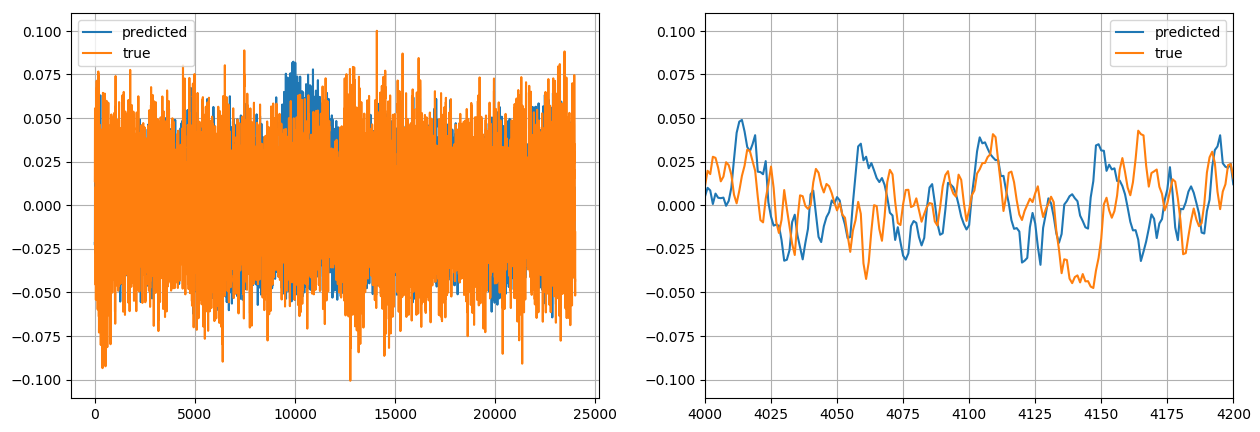

In [306]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(y2_pred, label="predicted")
ax[1].plot(y2i, label="true")
ax[2].plot(y2_pred, label="predicted")
ax[2].plot(y2i, label="true")
ax[1].grid(), ax[2].grid(), ax[2].set_xlim(4000, 4200), ax[1].legend(), ax[2].legend()
audioplayers(y2i, y2_pred, xtot, fs=fs_desired)

In [286]:
μ1 = 6
σ1 = 0.5
μ2 = 9
σ2 = 1
a = 20
b = 10

N = 10000

x1 = rand(Distributions.Normal(μ1, σ1), N)
x2 = rand(Distributions.Normal(μ2, σ2), N)
v = rand(Distributions.InverseGamma(a, b), N)
y = [rand(Distributions.Normal(log.(exp.(x1[n]) + exp.(x2[n])), sqrt(v[n]))) for n=1:N]
;

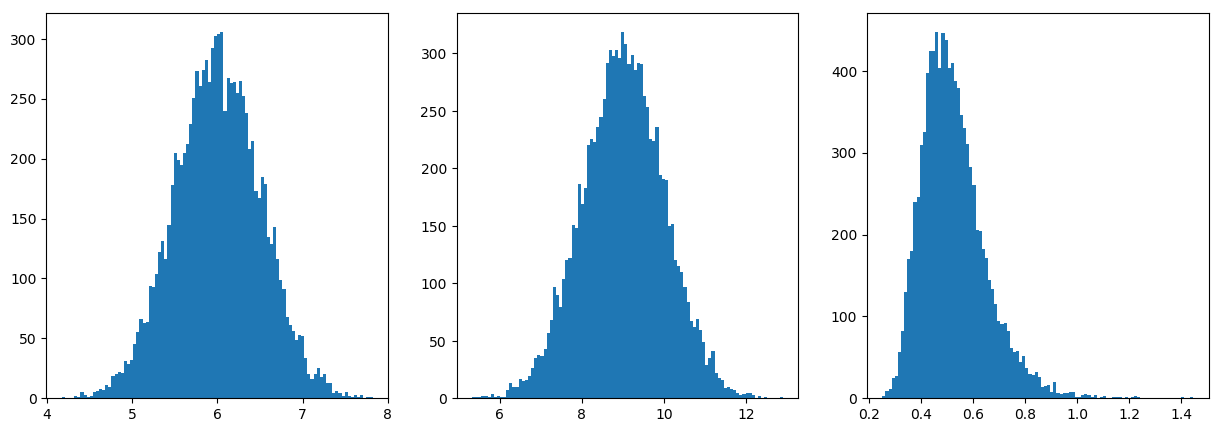

In [287]:
_, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[1].hist(x1, bins=100)
ax[2].hist(x2, bins=100)
ax[3].hist(v, bins=100)
;

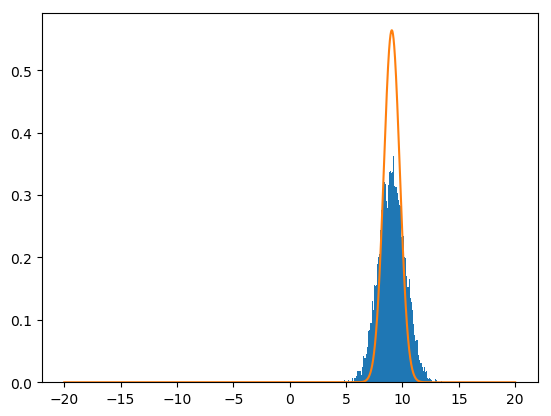

┌ Warning: `pdf(d::UnivariateDistribution, X::AbstractArray)` is deprecated, use `pdf.(d, X)` instead.
│   caller = top-level scope at In[198]:5
└ @ Core In[198]:5


(9.054589430511799, 0.9581125389424784)

In [198]:
yv = log(( exp(2*μ1 + σ1^2)*(exp(σ1^2) - 1) + exp(2*μ2 + σ2^2)*(exp(σ2^2) - 1) )/( (exp(μ1 + (σ1^2)/2) + exp(μ2 + (σ2^2)/2))^2 ) + 1)
ym = log(exp(μ1 + σ1^2/2) + exp(μ2 + σ2^2/2)) - yv/2

plt.hist(y, bins=100, density=true);
plt.plot(-20:0.01:20, Distributions.pdf(Distributions.Normal(ym, sqrt(b/a)), -20:0.01:20 ))
ym, yv 

In [118]:
var(y), log(exp(σ1^2) + exp(σ2^2)), yv, std(y), log(exp(σ1) + exp(σ2))

(0.9217510784404138, 1.3868710061148999, 0.9581125389424784, 0.9600786834631908, 1.4740769841801067)

In [119]:
mean(y), log(exp(μ1) + exp(μ2)), ym

(9.084740270462081, 9.048587351573742, 9.054589430511799)

In [195]:
m1 = 5
v1 = 1.5
m2 = 12
v2 = 4
ax = 3
bx = 3

3

In [196]:
#  η ∼ N(λ, ν)
update_ζ([m1, m2], [v1, v2])

1.2029184748250626e6

In [121]:
function update_ϕ(λ, β)
    return exp.(λ)*β
end

update_ϕ (generic function with 1 method)

In [122]:
function update_ζ(λ, ν2)
    return sum(exp.(λ + ν2/2))
end

update_ζ (generic function with 1 method)

In [123]:
function update_λ(λ, μ, ϕ, ζ, ν2)
    
end

update_λ (generic function with 1 method)

In [124]:
function update_ν2(Σ, ζ, λ, ν2)
    
end

update_ν2 (generic function with 1 method)